<a href="https://colab.research.google.com/github/HriddhiDoley/predicting_olympic_medal/blob/main/predict_olympic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This project explores the use of machine learning (ML) and deep learning (DL) techniques to predict the total number of Olympic medals a country will win. By analyzing various factors like GDP, population, and sports infrastructure, this study provides valuable insights into the key determinants of Olympic success. Leveraging models such as Random Forest and Neural Networks, the findings highlight the interplay between economic and sports-related features in influencing medal counts.


In [55]:
# Olympic Medals Prediction Project

## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Step 1: Load the Data set

In [56]:
# Load Dataset
data = pd.read_csv('gni-olympics.csv')
data.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


# Step 2: Understand the Data
1. Basic Analysis
2. Univariate
3. Bivariate / Multivariate analysis  

## 2.1 Basic Analysis
1. How big is the data?
2. How does the data look like?
3. What is the data type of cols?
4. Are there any missing values?
5. How does the data look mathematically?
6. Are there any duplicate values?
7. How is the correlation between cols?

In [67]:
# Shape of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (93, 14)


In [68]:
# First few rows
print("First 5 rows:")
print(data.head())

First 5 rows:
   iso  ioc        name      continent  population           gdp  \
0  ARG  ARG   Argentina  South America  45376763.0  3.830670e+11   
1  ARM  ARM     Armenia           Asia   2963234.0  1.264546e+10   
2  AUS  AUS   Australia        Oceania  25687041.0  1.330901e+12   
3  AUT  AUT     Austria         Europe   8917205.0  4.289654e+11   
4  AZE  AZE  Azerbaijan         Europe  10110116.0  4.260718e+10   

   olympics_index  sports_index  olympicsIndex  sportsIndex  total  gold  \
0       19.597142      9.324537      19.597142     9.324537      3     0   
1       19.681457     13.497324      19.681457    13.497324      4     0   
2       31.170099     11.073845      31.170099    11.073845     46    17   
3       12.212139     15.923033      12.212139    15.923033      7     1   
4       18.213838     13.103344      18.213838    13.103344      7     0   

   silver  bronze  
0       1       2  
1       2       2  
2       7      22  
3       1       5  
4       3       4  


In [69]:
# Random sample of 5 rows
print("Random Sample:")
print(data.sample(5))

Random Sample:
    iso  ioc        name continent   population           gdp  olympics_index  \
40  IDN  INA   Indonesia      Asia  273523621.0  1.058424e+12        8.214139   
89  UZB  UZB  Uzbekistan      Asia   34232050.0  5.770719e+10       24.830288   
61  MYS  MAS    Malaysia      Asia   32365998.0  3.366644e+11       10.995892   
62  NAM  NAM     Namibia    Africa    2540916.0  1.069993e+10       10.279839   
38  HRV  CRO     Croatia    Europe    4047200.0  5.596658e+10       17.372689   

    sports_index  olympicsIndex  sportsIndex  total  gold  silver  bronze  
40     11.075019       8.214139    11.075019      5     1       1       3  
89     11.631212      24.830288    11.631212      5     3       0       2  
61      8.920692      10.995892     8.920692      2     0       1       1  
62     29.504011      10.279839    29.504011      1     0       1       0  
38     32.752072      17.372689    32.752072      8     3       3       2  


In [70]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     float64
 5   gdp             93 non-null     float64
 6   olympics_index  91 non-null     float64
 7   sports_index    93 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 10.3+ KB


In [75]:
# Null values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    2
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [72]:
# Find rows with missing values
missing_rows = data[data.isnull().any(axis=1)]

# Display the rows with missing values
print(missing_rows)

    iso  ioc             name continent  population           gdp  \
17  CIV  CIV    Côte d'Ivoire       NaN  26378275.0  6.134858e+10   
42  IRL  IRL          Ireland    Europe   4994724.0  4.186218e+11   
57  MDA  MDA          Moldova       NaN   2617820.0  1.191404e+10   
59  MKD  MKD  North Macedonia       NaN   2083380.0  1.226695e+10   
80  SYR  SYR            Syria       NaN  17500657.0  0.000000e+00   
91  XKX  KOS           Kosovo       NaN   1775378.0  7.611402e+09   

    olympics_index  sports_index  olympicsIndex  sportsIndex  total  gold  \
17       10.795148     17.346961      10.795148    17.346961      1     0   
42             NaN     16.329262       0.000000     0.000000      4     2   
57       23.559762     10.575437      23.559762    10.575437      1     0   
59             NaN     16.329262       0.000000     0.000000      1     0   
80        7.750732     16.581705       7.750732    16.581705      1     0   
91        7.980882     22.469058       7.980882    22.

In [73]:
# Drop the missing values rows # Fill in the missing values in feature engineering
#data.dropna(inplace=True)

# Replace missing values with 'Missing'
data['continent'] = data['continent'].fillna('Missing')

In [74]:
# Statistical summary
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
         population           gdp  olympics_index  sports_index  \
count  9.300000e+01  9.300000e+01       91.000000     93.000000   
mean   6.639237e+07  8.668410e+11       20.677422     16.329262   
std    2.057474e+08  2.702387e+12       12.631319      8.835266   
min    3.393800e+04  0.000000e+00        1.000000      7.396478   
25%    4.994724e+06  4.369766e+10       12.694592     11.019952   
50%    1.132662e+07  1.698354e+11       18.783582     13.993115   
75%    4.735157e+07  5.153325e+11       26.099431     18.984764   
max    1.402112e+09  2.093660e+13      100.000000     72.227313   

       olympicsIndex  sportsIndex       total       gold     silver     bronze  
count      93.000000    93.000000   93.000000  93.000000  93.000000  93.000000  
mean       20.232746    15.978095   11.612903   3.655914   3.634409   4.322581  
std        12.852103     9.150623   19.091332   7.022471   6.626339   6.210372  
min         0.000000     0.000000    1.000000   0.0

In [76]:
# Duplicated rows
print("Number of Duplicated Rows:", data.duplicated().sum())

Number of Duplicated Rows: 0


In [77]:
# Drop duplicates
data.drop_duplicates(inplace=True)

Correlation Matrix:


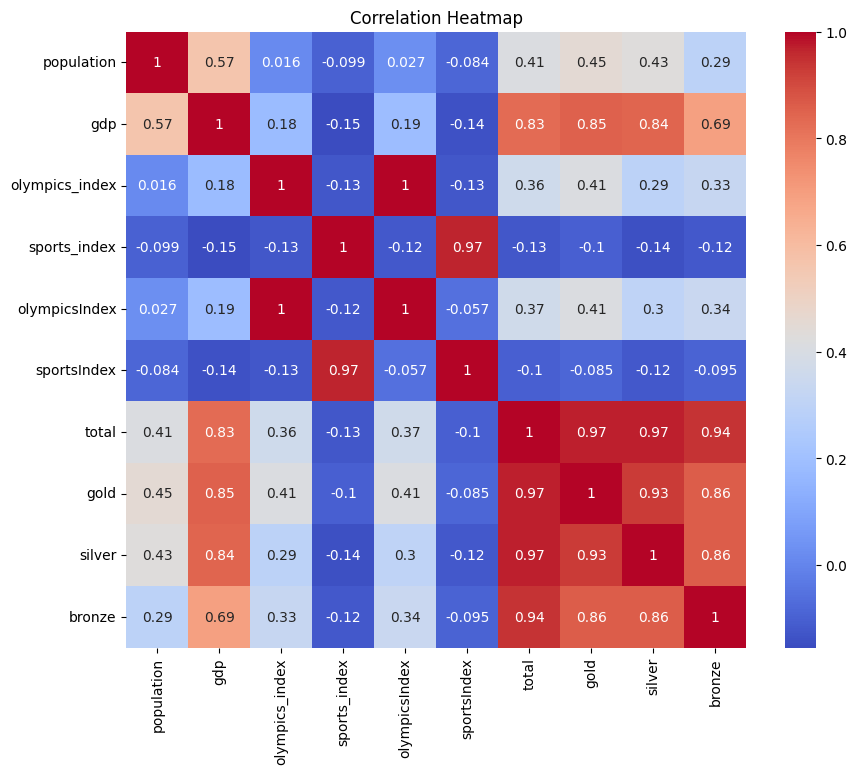

In [78]:
# Correlation matrix
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2.2 EDA: Univariate Analysis

    1. Countplot
    2. Piechart
    3. Histogram
    4. Distplot
    5. Boxplot
    6. Min(), max(), mean(), std dev, variance
    7. Skewness



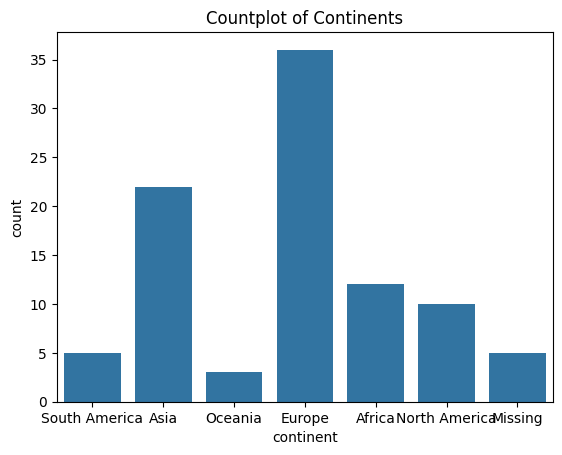

In [79]:
# Countplot for a categorical variable (continent)
sns.countplot(x='continent', data=data)
plt.title('Countplot of Continents')
plt.show()


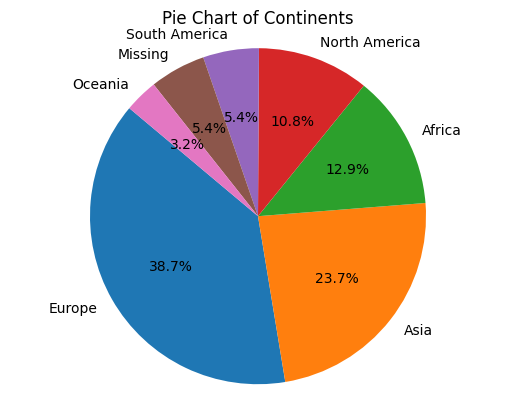

In [80]:
# Pie chart for total medals distribution
labels = data['continent'].value_counts().index  # Get labels from value_counts index
sizes = data['continent'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Continents')
plt.axis('equal')
plt.show()

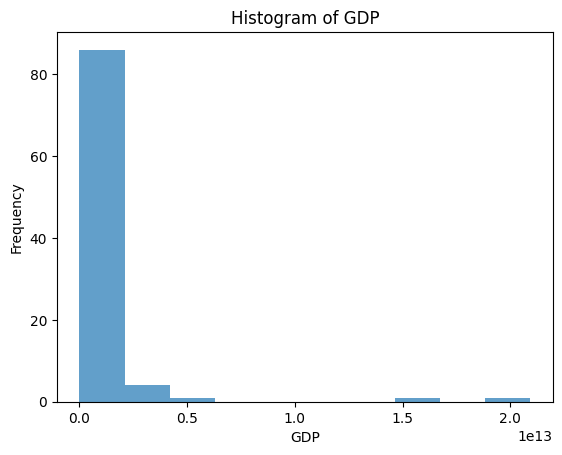

In [81]:
# Histogram for GDP
plt.hist(data['gdp'], bins=10, alpha=0.7)
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

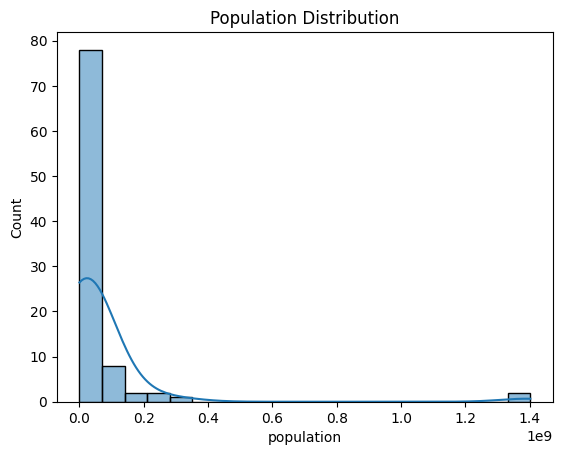

In [82]:
# Distplot for population
sns.histplot(data['population'], kde=True, bins=20)
plt.title('Population Distribution')
plt.show()


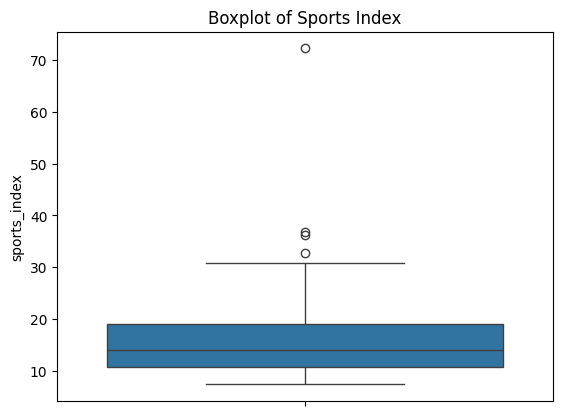

In [19]:
# Boxplot for sports index
sns.boxplot(y='sports_index', data=data)
plt.title('Boxplot of Sports Index')
plt.show()

In [83]:
# Calculate quantiles and IQR
Q1 = data['sports_index'].quantile(0.25)
Q3 = data['sports_index'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to get rows with outliers
outliers = data[(data['sports_index'] < lower_bound) | (data['sports_index'] > upper_bound)]

# Display the outlier rows
print(outliers)

    iso  ioc      name continent   population           gdp  olympics_index  \
28  ETH  ETH  Ethiopia    Africa  114963583.0  1.076451e+11       21.377148   
38  HRV  CRO   Croatia    Europe    4047200.0  5.596658e+10       17.372689   
44  ISR  ISR    Israel      Asia    9216900.0  4.019538e+11       13.390580   
76  SRB  SRB    Serbia    Europe    6908224.0  5.296013e+10       19.545210   

    sports_index  olympicsIndex  sportsIndex  total  gold  silver  bronze  
28     72.227313      21.377148    72.227313      4     1       1       2  
38     32.752072      17.372689    32.752072      8     3       3       2  
44     36.758159      13.390580    36.758159      4     2       0       2  
76     36.277430      19.545210    36.277430      9     3       1       5  


In [84]:
# Summary statistics for specific features
print("GDP Statistics:")
print("Min:", data['gdp'].min())
print("Max:", data['gdp'].max())
print("Mean:", data['gdp'].mean())
print("Standard Deviation:", data['gdp'].std())
print("Variance:", data['gdp'].var())

GDP Statistics:
Min: 0.0
Max: 20936600000000.0
Mean: 866840997410.7097
Standard Deviation: 2702387141886.764
Variance: 7.302896264634914e+24


In [85]:
# Skewness of numerical columns
print("Skewness of Numerical Features:")
print(data[['gdp', 'population', 'sports_index']].skew())

Skewness of Numerical Features:
gdp             6.098092
population      5.958251
sports_index    3.221963
dtype: float64


## 2.3 EDA: Multivariate Analysis

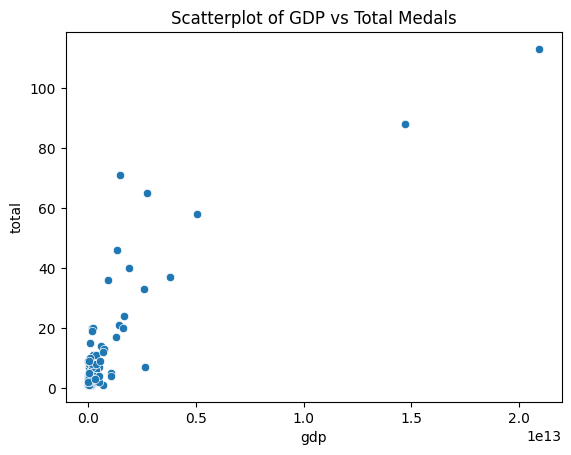

In [86]:
# Scatterplot for GDP vs. Total Medals
sns.scatterplot(x='gdp', y='total', data=data)
plt.title('Scatterplot of GDP vs Total Medals')
plt.show()

<ipython-input-87-49069b5224a7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='continent', y='total', data=data, ci=None)


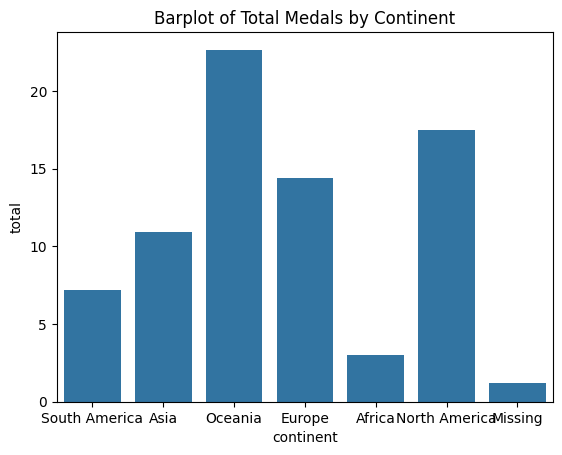

In [87]:
# Barplot for medals by continent
sns.barplot(x='continent', y='total', data=data, ci=None)
plt.title('Barplot of Total Medals by Continent')
plt.show()

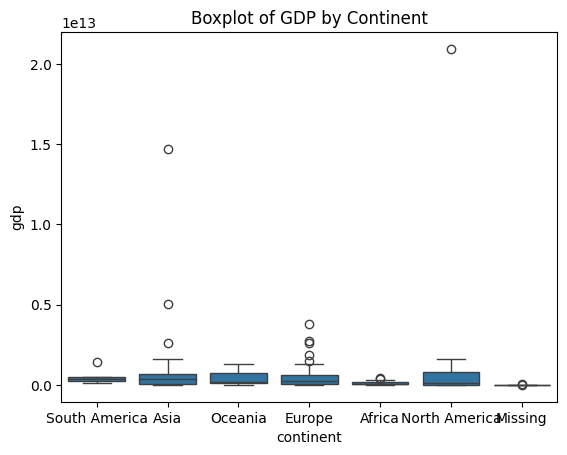

In [88]:
# Boxplot for GDP by continent
sns.boxplot(x='continent', y='gdp', data=data)
plt.title('Boxplot of GDP by Continent')
plt.show()

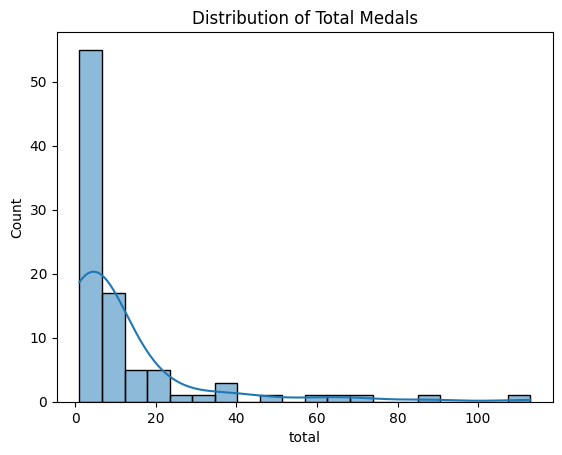

In [89]:
# Distplot for Total Medals
sns.histplot(data['total'], kde=True, bins=20)
plt.title('Distribution of Total Medals')
plt.show()

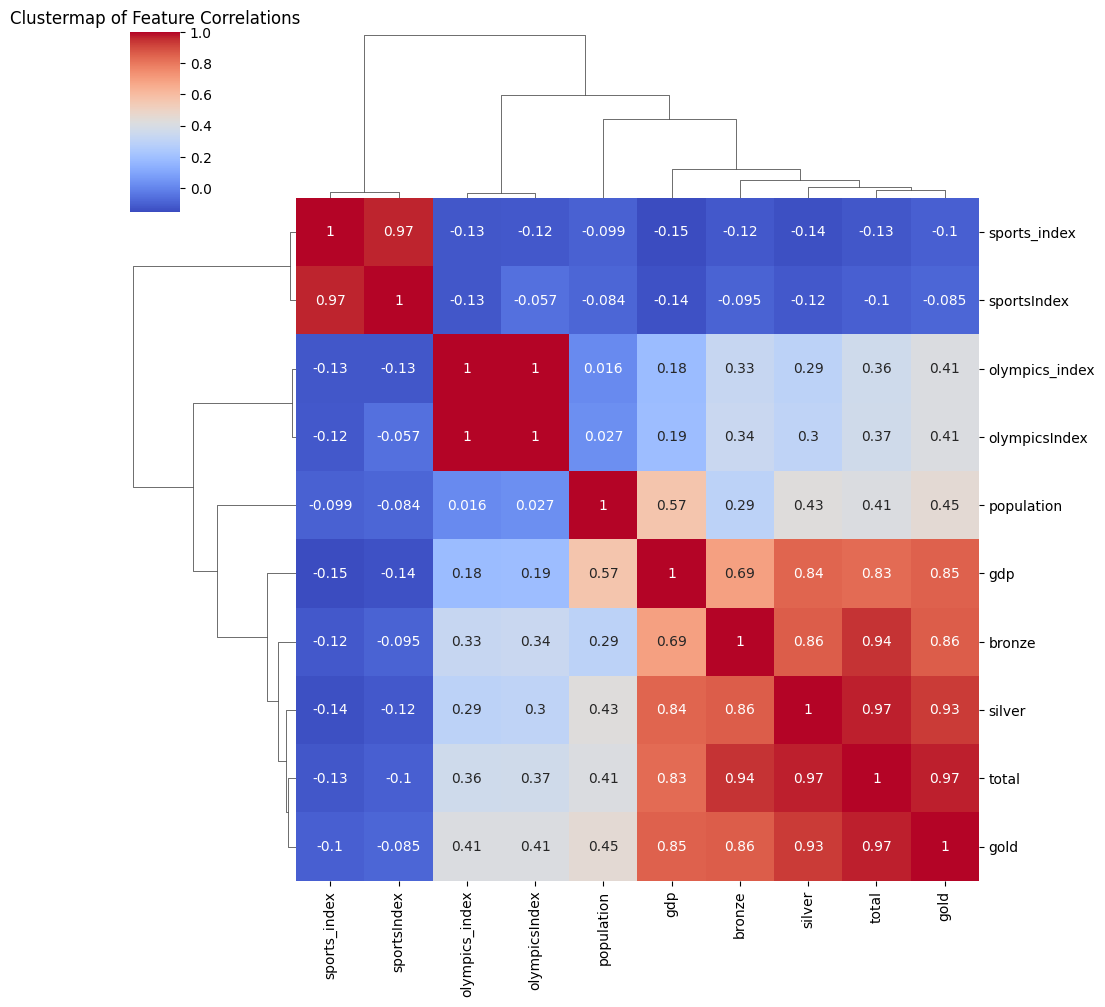

In [90]:
# Clustermap of correlations
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.clustermap(numerical_data.corr(), cmap='coolwarm', annot=True)
plt.title('Clustermap of Feature Correlations')
plt.show()

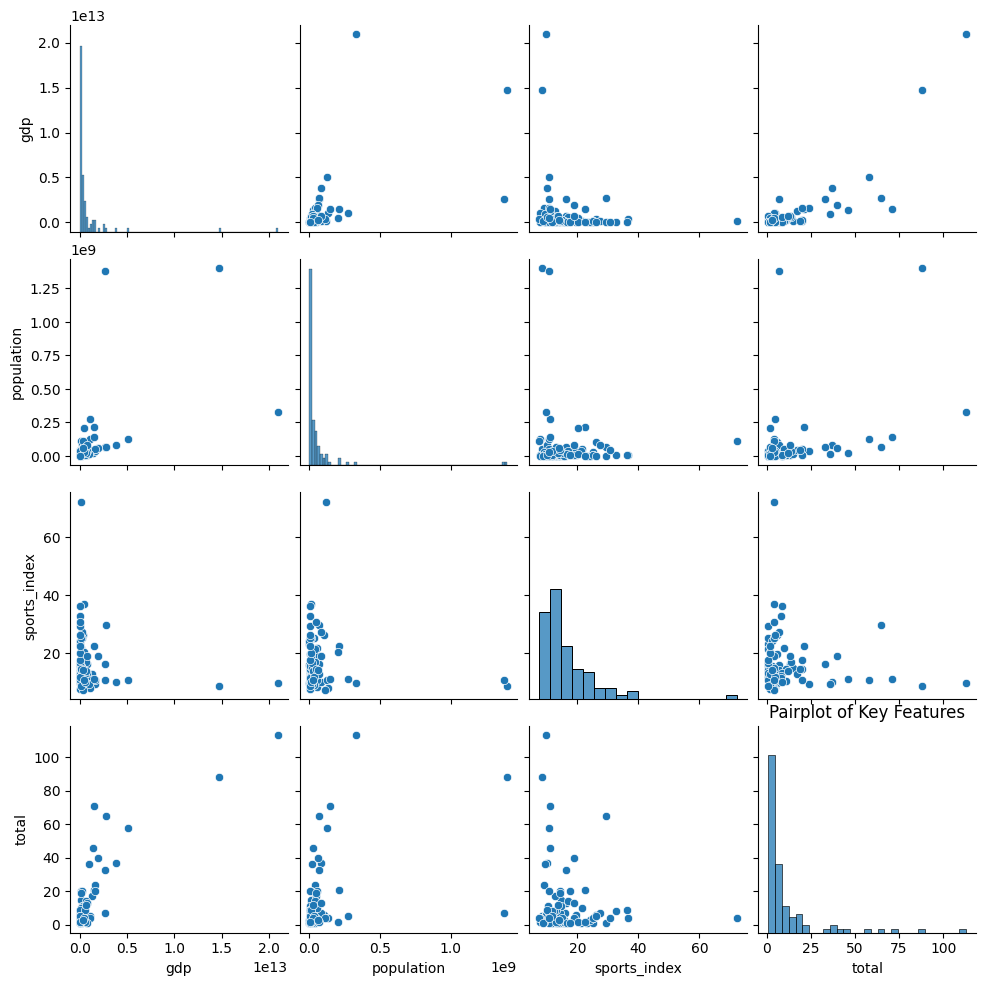

In [28]:
# Pairplot for key numerical features
sns.pairplot(data[['gdp', 'population', 'sports_index', 'total']])
plt.title('Pairplot of Key Features')
plt.show()

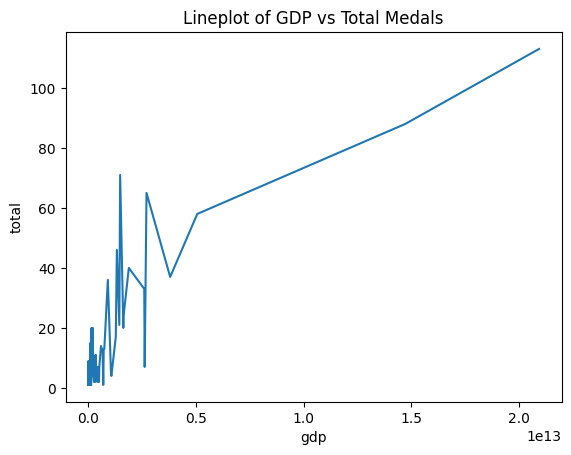

In [29]:
# Lineplot for GDP and Total Medals
sns.lineplot(x='gdp', y='total', data=data)
plt.title('Lineplot of GDP vs Total Medals')
plt.show()


# Feature Engineering
1. Feature Transformation
	* Missing Value imputation
	* Handling categorical Features
	* Outlier detection
	* Feature scaling
2. Feature Construction
3. Feature Selection
Feature Extraction

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Missing Value Imputation
# Impute missing values with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
data[['gdp', 'population', 'sports_index']] = imputer.fit_transform(data[['gdp', 'population', 'sports_index']])

In [32]:
# Handling Categorical Features
# Convert categorical features (if any) to numerical using one-hot encoding (example: 'continent')
data = pd.get_dummies(data, columns=['continent'], drop_first=True)

In [33]:
# Outlier Handling
# Replace outliers using the IQR method with median values
for column in ['gdp', 'population', 'sports_index']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, data[column].median(), data[column])
    data[column] = np.where(data[column] > upper_bound, data[column].median(), data[column])

In [35]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()
data[['gdp', 'population', 'sports_index']] = scaler.fit_transform(data[['gdp', 'population', 'sports_index']])

In [ ]:
#alternative to the above scaling
# Normalize numerical features (GDP and population)
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['gdp', 'population']] = scaler.fit_transform(data[['gdp', 'population']])
'''

In [36]:
# Feature Engineering
# Feature Construction: Interaction between GDP and Population
data['gdp_population_interaction'] = data['gdp'] * data['population']

In [38]:
# Advanced Feature Selection
# Use SelectKBest to select top 3 features based on ANOVA F-statistics
from sklearn.feature_selection import SelectKBest, f_regression # Import SelectKBest and f_regression

X = data[['gdp', 'population', 'sports_index', 'gdp_population_interaction']]
y = data['total']
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)

Selected Features: Index(['population', 'sports_index', 'gdp_population_interaction'], dtype='object')


In [40]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.34195846 0.32758741]


In [41]:
# Replace X with PCA-transformed features if desired
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#EDA after data preprocessing and feature engineering

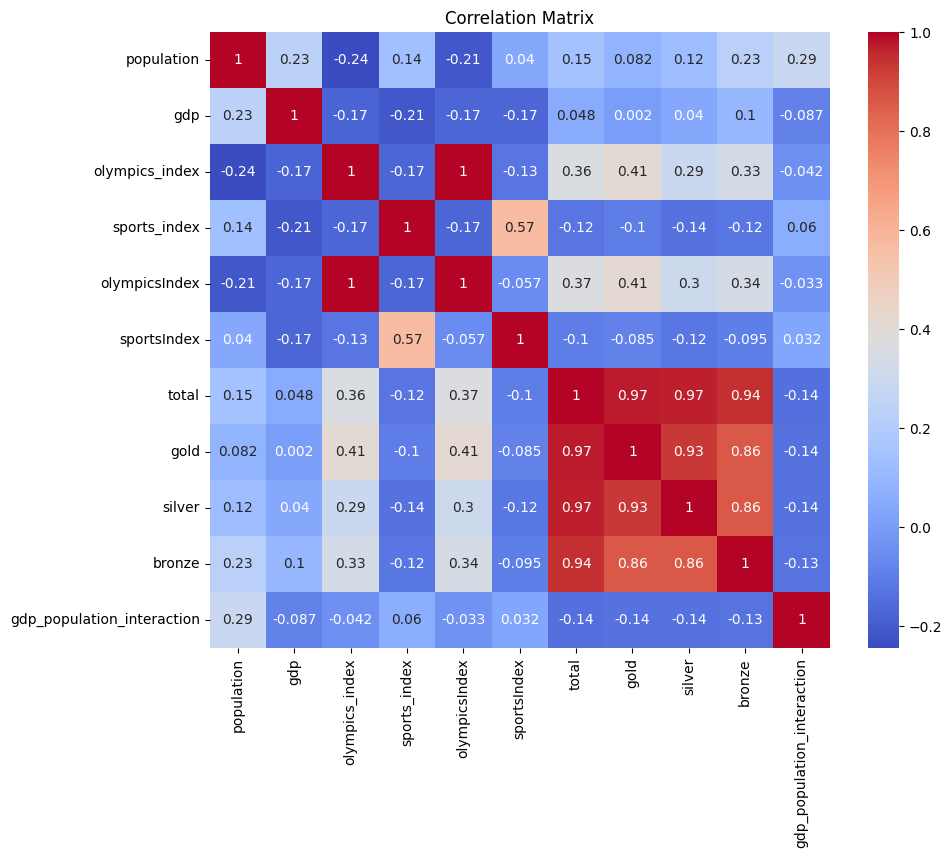

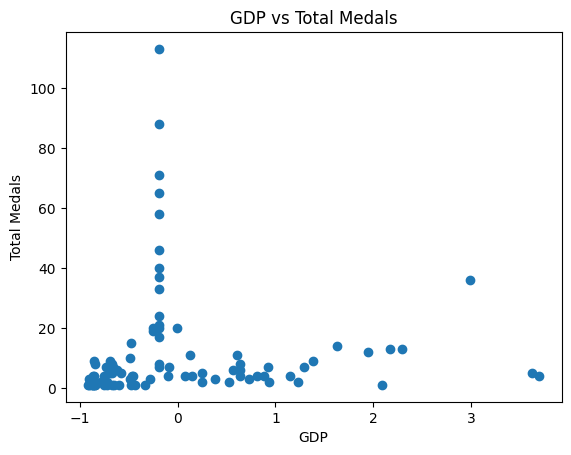

In [43]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot
plt.scatter(data['gdp'], data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

# Train-Test Split

In [44]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Machine Learning

In [45]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [46]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [47]:
# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [48]:
# Evaluation Function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [49]:
# Evaluate Models
results = {
    'Linear Regression': evaluate_model(y_test, y_pred_lr),
    'Decision Tree': evaluate_model(y_test, y_pred_dt),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
}

results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R2']).T
print(results_df)

                        MAE         MSE        R2
Linear Regression  8.982610  104.580419 -2.075895
Decision Tree      8.210526  127.894737 -2.761610
Random Forest      8.061053  106.149516 -2.122045


#Deep Learning

In [50]:
# Build Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [52]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
y_pred_nn = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 57.1789 - mean_absolute_error: 5.6227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [53]:
# Add Neural Network to Results
nn_results = evaluate_model(y_test, y_pred_nn.flatten())
results_df.loc['Neural Network'] = nn_results
print(results_df)

                        MAE         MSE        R2
Linear Regression  8.982610  104.580419 -2.075895
Decision Tree      8.210526  127.894737 -2.761610
Random Forest      8.061053  106.149516 -2.122045
Neural Network     5.622690   57.178936 -0.681733


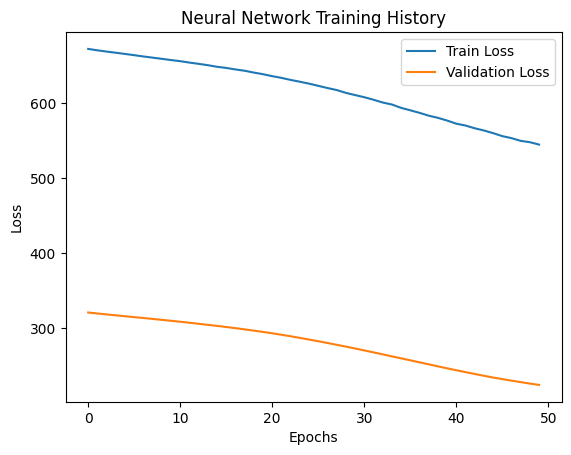

In [54]:
# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Neural Network Training History')
plt.show()
